In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url = 'https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv'
df = pd.read_csv(url)
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [3]:
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [4]:
data = df.drop(['Like','VisitFrequency','Gender','Age'], axis = 'columns')
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No


In [5]:
data = data.replace({'Yes': 1, 'No': 0})
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


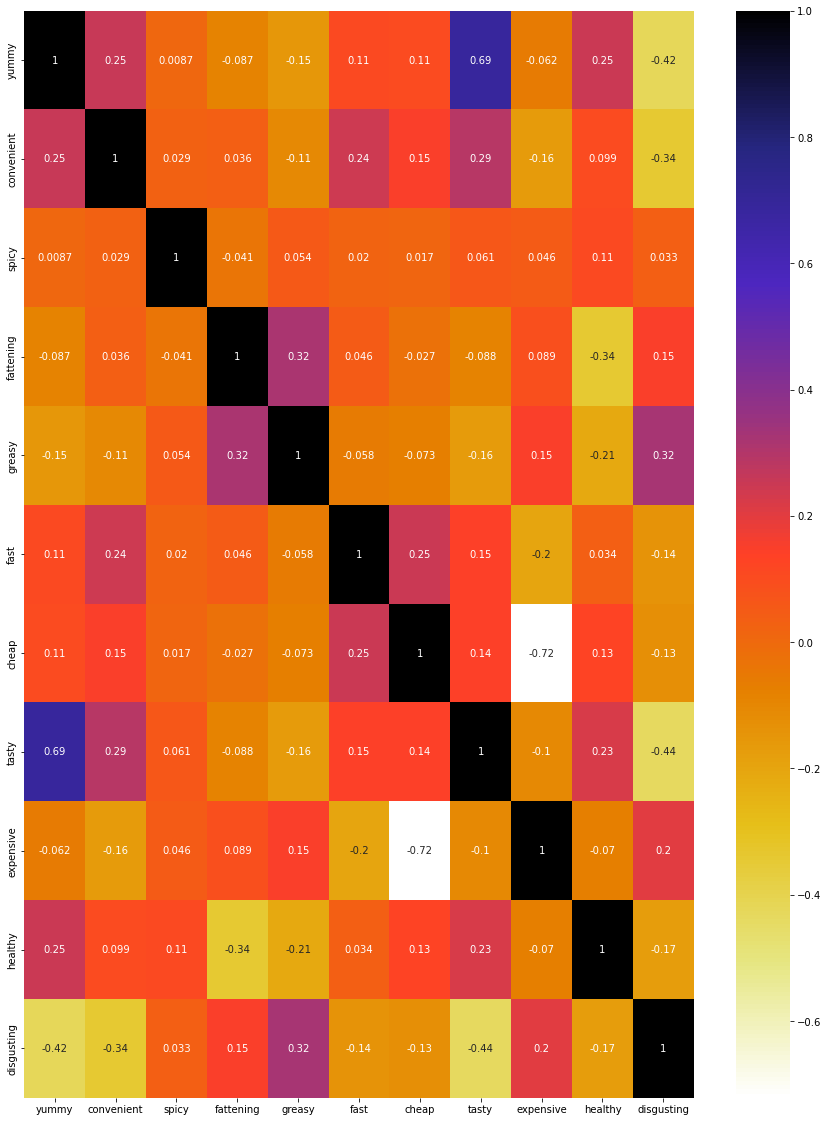

In [6]:
import seaborn as sns
plt.figure(figsize = (15,20))
cor = data.corr()
sns.heatmap(cor,annot = True,cmap = plt.cm.CMRmap_r)
plt.show()

In [7]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
finalData = pca.fit_transform(data)
finalData.shape

(1453, 10)

In [8]:
pca.explained_variance_ratio_

array([0.29944723, 0.19279721, 0.13304535, 0.08309578, 0.05948052,
       0.05029956, 0.0438491 , 0.03954779, 0.0367609 , 0.03235329])

C:\Users\Kalyaan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


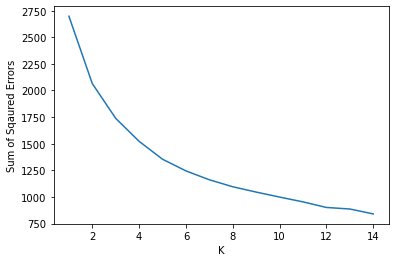

In [9]:
from sklearn.cluster import KMeans

inertia = []
for n in range(1,15):
    model = KMeans(n_clusters = n, init='k-means++')
    model.fit(finalData)
    inertia.append(model.inertia_)
    
plt.plot(range(1,15),inertia)
plt.xlabel("K")
plt.ylabel("Sum of Sqaured Errors")
plt.show()

In [10]:
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

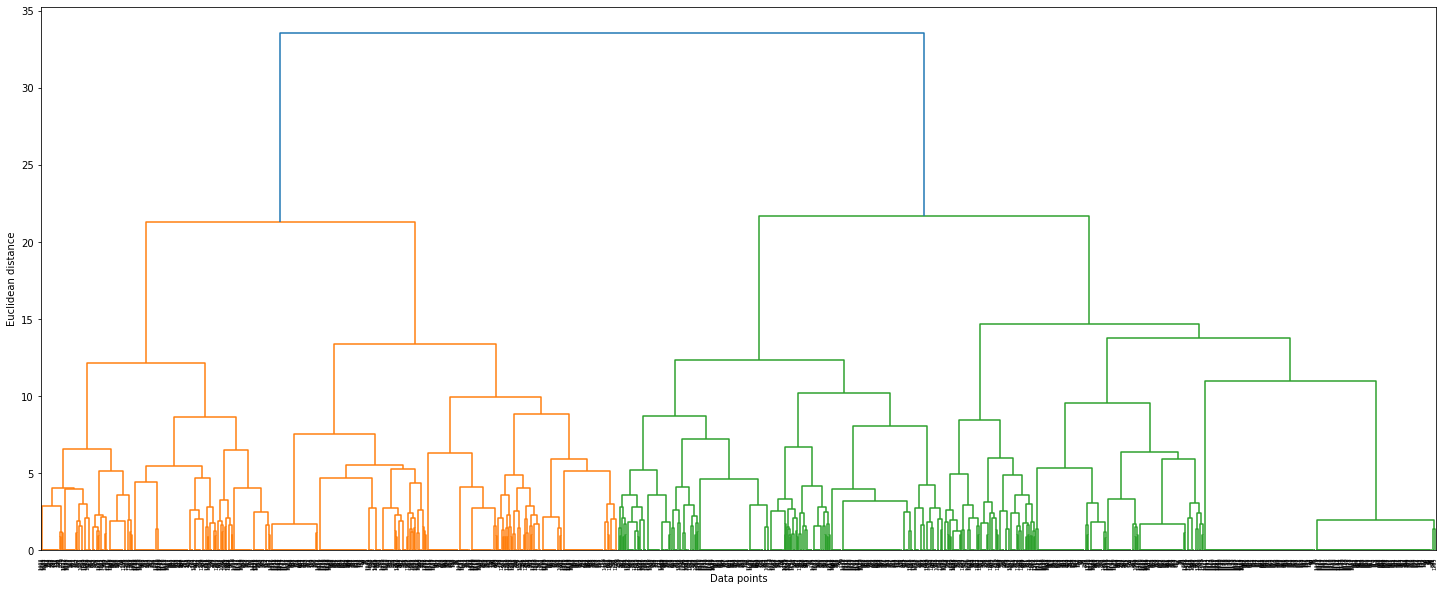

In [11]:
merg = linkage(finalData,method="ward")
plt.figure(figsize=(25,10))
dendrogram(merg,leaf_rotation = 90)
plt.xlabel("Data points")
plt.ylabel("Euclidean distance")
plt.show()

In [13]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 8, min_samples = 4).fit(finalData)
labels = dbscan.labels_

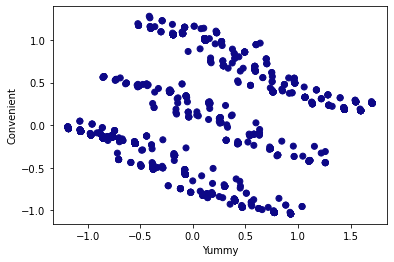

In [14]:
plt.scatter(finalData[:, 0], finalData[:, 1], c = labels, cmap = 'plasma')
plt.xlabel('Yummy')
plt.ylabel('Convenient')
plt.show()

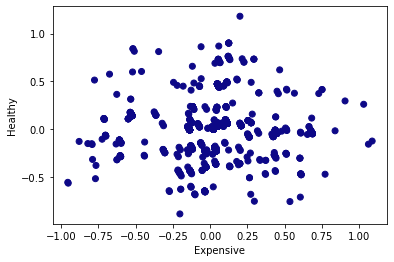

In [16]:
plt.scatter(finalData[:, 8], finalData[:, 9], c = labels, cmap = 'plasma')
plt.xlabel('Expensive')
plt.ylabel('Healthy')
plt.show()

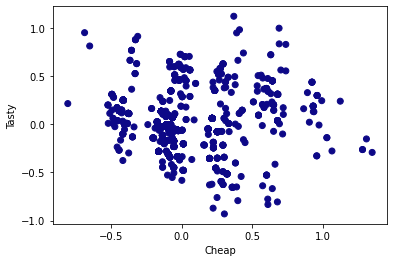

In [17]:
plt.scatter(finalData[:, 6], finalData[:, 7], c = labels, cmap = 'plasma')
plt.xlabel('Cheap')
plt.ylabel('Tasty')
plt.show()

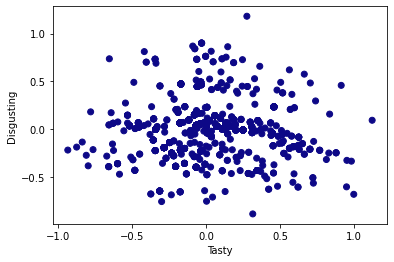

In [19]:
plt.scatter(finalData[:, 7], finalData[:, 9], c = labels, cmap = 'plasma')
plt.xlabel('Tasty')
plt.ylabel('Disgusting')
plt.show()